# Weight of Fish Prediction
In this project I tried to develop a simple machine learning model to predict the weight of a fish speciesusing the sklearn library. I used the Linear Regression algorithm for the model.

Importing the required libraries and reading the csv file into the notebook with pandas. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('fish_proj.csv')

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
data = df.copy()

In [5]:
data.sample(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
119,Perch,850.0,36.9,40.0,42.3,11.9286,7.1064
71,Parkki,300.0,24.0,26.0,29.0,11.3680,4.2340
17,Bream,700.0,30.4,33.0,38.5,14.9380,5.1975
123,Perch,1100.0,39.0,42.0,44.6,12.8002,6.8684
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320


In [6]:
df.shape

(159, 7)

In [7]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [9]:
df.rename(columns = {'Length1':'Vertical','Length2':'Diagonal','Length3':'Cross'},inplace=True)

The code above renames the columns **Length1,Length2 and Length3** to **Vertical, Diagonal, and Cross respectively**.

In [10]:
df.head()

,Species,Weight,Vertical,Diagonal,Cross,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Vertical,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Diagonal,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Cross,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [12]:
sp = df.Species.value_counts()
sp

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

We can see that there are 7 species of fish in the dataset.

In [13]:
sp = pd.DataFrame(sp)
sp.T # To transpose

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


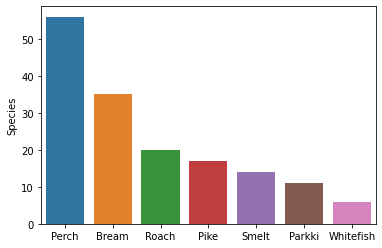

In [14]:
import seaborn as sns 
sns.barplot(x=sp.index, y=sp.Species)
xlabel=('Species of Fish')
ylabel=('Number of Fishes')
plt.savefig('barplots.png')

In [15]:
df.corr()

,Weight,Vertical,Diagonal,Cross,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Vertical,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Diagonal,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Cross,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


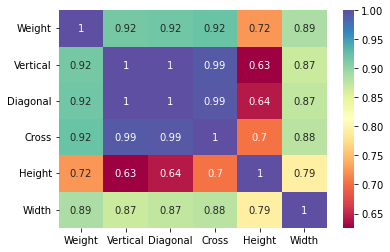

In [16]:
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.savefig('corrmap.png')

<AxesSubplot:xlabel='Weight'>

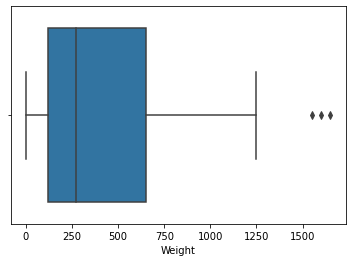

In [17]:
# Checking for outliers with a BoxPlot
sns.boxplot(x=df.Weight)

The boxplot shows that we have some outliers we will fix that.

In [18]:
# Removing the outliers by saving only weights<1500
df = df[df.Weight <= 1500]

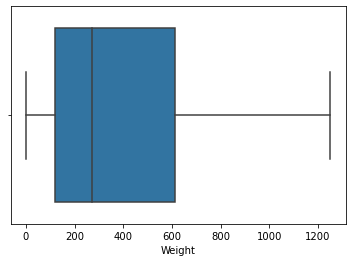

In [19]:
sns.boxplot(x=df.Weight)
plt.savefig('BoxPlot.png')

In [20]:
df.shape

(156, 7)

In [21]:
df.head()

,Species,Weight,Vertical,Diagonal,Cross,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [22]:
X = df.iloc[:,2:7] 
y = df.Weight

 Since we want to predict the weight then our target variable will be **Weight**. While the remaining columns will be our feature variable.

 **Note:** Using just':' We get all the rows and '2:7' Gets all the columns from after index[1] to index[7] 

In [23]:
X.head()

,Vertical,Diagonal,Cross,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340


In [24]:
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 156, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
y_test.head()

77     100.0
66     140.0
65     150.0
146      7.5
59     800.0
Name: Weight, dtype: float64

In [27]:
from sklearn.linear_model import LinearRegression

We import the train_test_split and LinearRegression functions from sklearn library.

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train, y_train)

LinearRegression()

Fitting the model...

In [30]:
import joblib

joblib.dump(model, 'fish_predictor.pkl')

['fish_predictor.pkl']

We import joblib and save the model to a pickle file.

In [31]:
y_pred = model.predict(X_test)
y_pred

array([  79.53783821,  223.0610398 ,  241.68466989, -151.2625957 ,
        681.74094757,  136.38598877,  398.21150186,  511.647228  ,
        234.35362132,  795.90564032,   78.51275168,  813.35652997,
         78.52658602,  520.47528433, -119.04708828,  820.59036568,
        720.48191548, -156.57530453,   98.88503749, -131.4017612 ,
        570.97315837,  224.2153285 ,  173.14140662,  147.74871819,
         61.77322626,  159.81549091,  196.25658238,  289.15585784,
        703.38607057,  138.32100373,  765.44422895,  769.1905442 ])

We use our model to predict the weights using the test set.

In [32]:
y_pred = pd.DataFrame(y_pred, columns=['Predicted Values'])
y_pred.head()

,Predicted Values
0,79.537838
1,223.061040
2,241.684670
3,-151.262596
4,681.740948


We save the predicted values to a dataframe.

In [33]:
y_test = pd.DataFrame(y_test)
y_test.head()

,Weight
77,100.0
66,140.0
65,150.0
146,7.5
59,800.0


In [34]:
model.coef_

array([127.21220641, -74.81743084, -35.51656956,  40.17739371,
        65.94597228])

The code above shows us the coefficient values used for the algorithm

In [35]:
model.intercept_

-381.53657722165065

The code above shows us the intercept value.

In [36]:
y_test = y_test.reset_index(drop=True)

In [37]:
y_output = pd.concat([y_test, y_pred], axis = 1)

In [38]:
y_output

,Weight,Predicted Values
0,100.0,79.537838
1,140.0,223.061040
2,150.0,241.684670
3,7.5,-151.262596
4,800.0,681.740948
5,120.0,136.385989
6,273.0,398.211502
7,500.0,511.647228
8,180.0,234.353621
9,1000.0,795.905640


We save the predicted values and the actual weight to a dataframe **y_output** so we can see the differences in accuracy better.

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)*100

86.26450453907802

The r-squared(r2_score) shows how well the data fit the regression model (the goodness of fit).

The python script fish_predictor_script.py can be used to predict fish weight using the saved model when the user inputs the parameters.